# Sales Data Study

### This notebook contains the  analysis of sample sales data as part of the Level 1 Assignment for the position of Jr.Data Analyst in Chargeback Gurus

## Contents.

#### 1.Order Quantity Distribution
#### 2.Price Distribution
#### 3.Sales Distribution
#### 4.Deal Size Distribution
#### 5.Status Distribution
#### 6.Annual Revenue
#### 7.Monthly Revenue
#### 8.Monthly growth of Revenue
#### 9.Sales in various countries
#### 10.Number of unique customers in each month
#### 11.Average sales per order
#### 12.Growth rate of the customers
#### 13.Recency, Frequency and Monetary value for each customer
#### 14. Segmentation using KMeans Clustering algorithm
#### 15.Finding customer personas using snake plot
#### 16.Relative importance of each attributes


In [112]:
# importing the necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [113]:
sales_data = pd.read_csv(r'C:\Users\Ramesh\Desktop\Data Asessment\sales_data_sample.csv',encoding= 'unicode_escape')

In [114]:
sales_data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [115]:
sales_data.shape

(2823, 25)

In [116]:
sales_data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

### Dropping the columns 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'STATE', 'POSTALCODE' that are not necessarily required for the data analysis

In [117]:
sales_data.drop(['PHONE','ADDRESSLINE1','ADDRESSLINE2','STATE','POSTALCODE'], axis =1, inplace = True)


In [118]:
sales_data.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
CITY                   0
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [119]:
sales_data.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
CITY                 object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

##### We can see that the order date is object type.Have to change it to datetime

In [120]:
sales_data['ORDERDATE'] = pd.to_datetime(sales_data['ORDERDATE'])

####  .Stats summary of the Quantitative variables

In [121]:
sales_data[['QUANTITYORDERED','PRICEEACH','SALES','MSRP']].describe()


,QUANTITYORDERED,PRICEEACH,SALES,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000
mean,35.092809,83.658544,3553.889072,100.715551
std,9.741443,20.174277,1841.865106,40.187912
min,6.000000,26.880000,482.130000,33.000000
25%,27.000000,68.860000,2203.430000,68.000000
50%,35.000000,95.700000,3184.800000,99.000000
75%,43.000000,100.000000,4508.000000,124.000000
max,97.000000,100.000000,14082.800000,214.000000


# 1.Order Quantity Distribution

Text(0.5, 1.0, 'ORDER QUANTITY DISTRIBUTION')

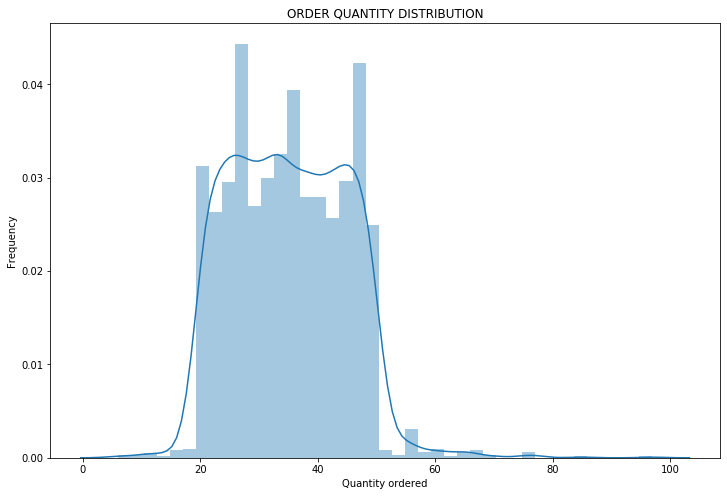

In [122]:
plt.figure(figsize =(12,8))
sns.distplot(sales_data['QUANTITYORDERED'])

plt.xlabel('Quantity ordered')
plt.ylabel('Frequency')
plt.title('ORDER QUANTITY DISTRIBUTION')

### Aftrer analysing order quantity distribution,we can see that Maximum numbers of orders are between 20 and 50

# 2.Price Distribution

Text(0.5, 1.0, 'PRICE DISTRIBUTION')

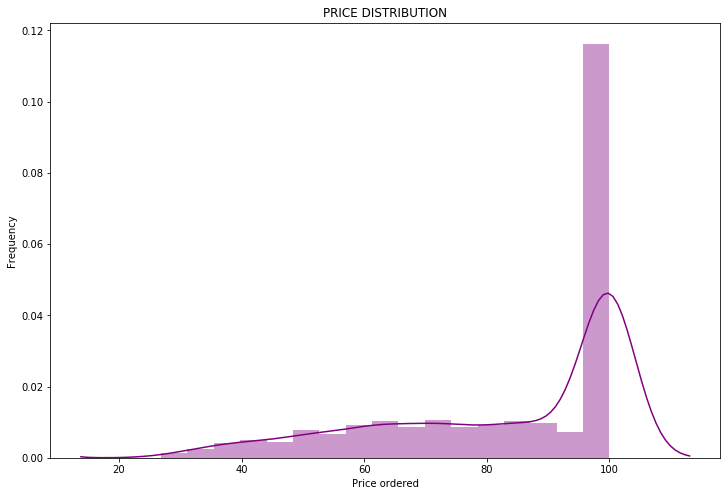

In [123]:
plt.figure(figsize =(12,8))
sns.distplot(sales_data['PRICEEACH'],color = 'purple')

plt.xlabel('Price ordered')
plt.ylabel('Frequency')
plt.title('PRICE DISTRIBUTION')

### After analysing price distribution ,We can see that the most price ordered are 100 Dollars and its the highest price too

# 3.Sales Distribution

Text(0.5, 1.0, 'SALES DISTRIBUTION')

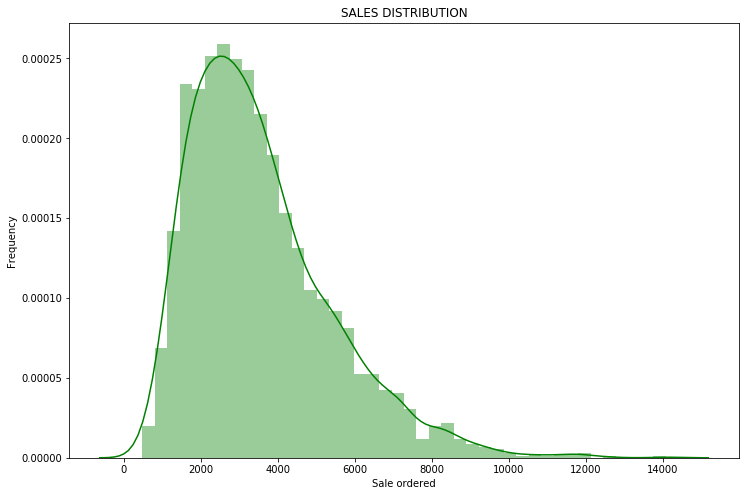

In [124]:
plt.figure(figsize =(12,8))
sns.distplot(sales_data['SALES'],color ='green')

plt.xlabel('Sale ordered')
plt.ylabel('Frequency')
plt.title('SALES DISTRIBUTION')

### After analysing the sales data , We can see that the most sales are between 2000 and 4000 units

# 4.Deal size distribution

Text(0.5, 1.0, 'DEAL SIZE DISTRIBUTION')

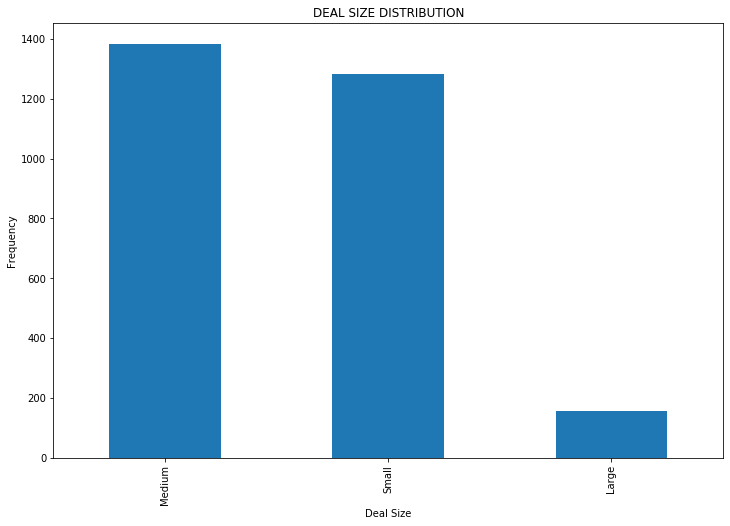

In [125]:
plt.figure(figsize =(12,8))
ax = sales_data['DEALSIZE'].value_counts().plot(kind='bar')

plt.xlabel('Deal Size')
plt.ylabel('Frequency')
plt.title('DEAL SIZE DISTRIBUTION')

### After analysing the deal size distribution we can see that the most number of deals belong to the medium size followed by small and then large

# 5.Status Distribution

In [126]:
sales_data['STATUS'].value_counts()

Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64

Text(0.5, 1.0, 'STATUS DISTRIBUTION')

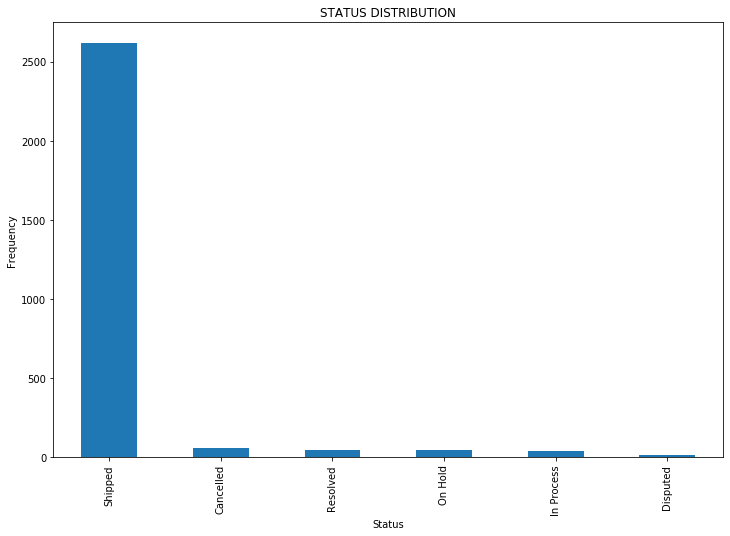

In [127]:
plt.figure(figsize =(12,8))
ax = sales_data['STATUS'].value_counts().plot(kind='bar')

plt.xlabel('Status')
plt.ylabel('Frequency')
plt.title('STATUS DISTRIBUTION')

### After analysing the status distribution,We can see that compared to the 'Shipped' status ,Others are very negligible

### Checking the time range of the years

In [128]:
sales_data.groupby(['YEAR_ID'])['MONTH_ID'].nunique()

YEAR_ID
2003    12
2004    12
2005     5
Name: MONTH_ID, dtype: int64

#### We can see that 2005 only have 5 months covered in the data . So the yearly revenue of 2005 cannot be calculated.

# 6.Annual Revenue

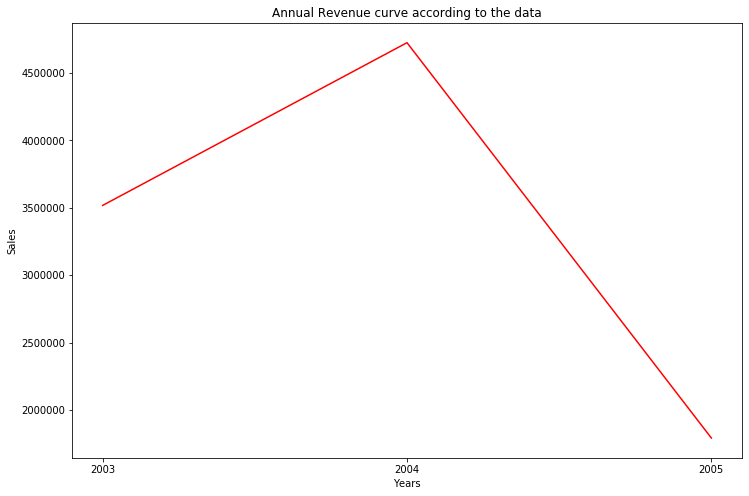

In [129]:
plt.figure(figsize =(12,8))

sales_data.groupby(['YEAR_ID'])['SALES'].sum().plot(c='red')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.title('Annual Revenue curve according to the data')
plt.xticks(np.arange(2003,2006,1))
plt.show()

### After plotting the  annual revenue curve from the data we can see that there is a decrease of sales  in the year 2005, This is because we only have 5 months of data for the year 2005. So its better to plot Monthly Revenue for this dataset

# 7.Monthly Revenue

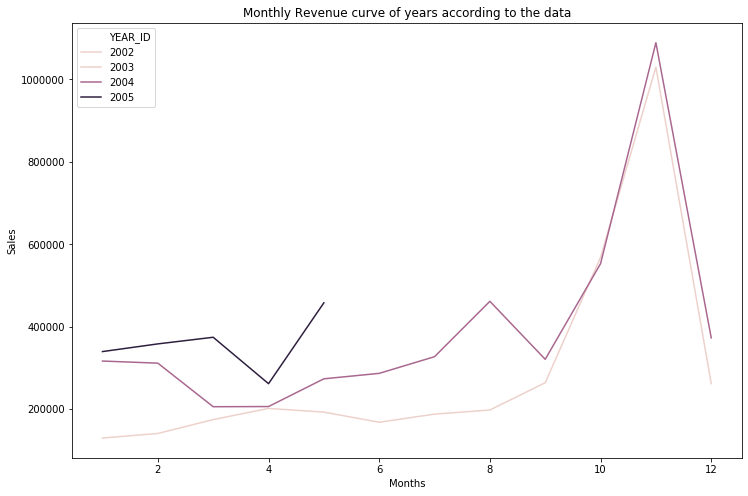

In [130]:
plt.figure(figsize =(12,8))

monthly_revenue = sales_data.groupby(['YEAR_ID','MONTH_ID'])['SALES'].sum().reset_index()

sns.lineplot(x= 'MONTH_ID', y= 'SALES',data = monthly_revenue,hue ='YEAR_ID')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.title('Monthly Revenue curve of years according to the data')

plt.show()

### After analysing the monthly revenue  of the data , We can see that the sales  are the maximum between october and december . Also while looking at the sales curve for the months of 2005, we can see that there is a tremendous increase in sales compared to the other years

# 8.Monthly growth rate of revenue

In [131]:
monthly_revenue['MONTHLY_GROWTH'] = monthly_revenue['SALES'].pct_change()

In [132]:
monthly_revenue

,YEAR_ID,MONTH_ID,SALES,MONTHLY_GROWTH
0,2003,1,129753.60,NaN
1,2003,2,140836.19,0.085413
2,2003,3,174504.90,0.239063
3,2003,4,201609.55,0.155323
4,2003,5,192673.11,-0.044325
5,2003,6,168082.56,-0.127628
6,2003,7,187731.88,0.116903
7,2003,8,197809.30,0.053680
8,2003,9,263973.36,0.334484
9,2003,10,568290.97,1.152835


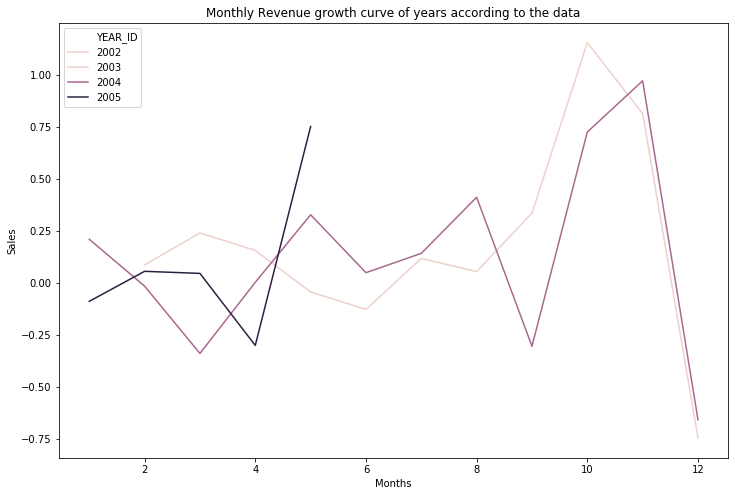

In [133]:
plt.figure(figsize =(12,8))


sns.lineplot(x= 'MONTH_ID', y= 'MONTHLY_GROWTH',data = monthly_revenue,hue ='YEAR_ID')

plt.xlabel('Months')

plt.ylabel('Sales')
plt.title('Monthly Revenue growth curve of years according to the data')

plt.show()

### After analysing the monthly  revenue growth curve of all the years, The most tremendous growth can be seen in 2005 from April to June 



# 9.Sales amount in various countries

In [134]:
top_countries = sales_data.groupby(['COUNTRY'])['SALES'].sum().sort_values(ascending = False)
top_countries




COUNTRY
USA            3627982.83
Spain          1215686.92
France         1110916.52
Australia       630623.10
UK              478880.46
Italy           374674.31
Finland         329581.91
Norway          307463.70
Singapore       288488.41
Denmark         245637.15
Canada          224078.56
Germany         220472.09
Sweden          210014.21
Austria         202062.53
Japan           188167.81
Switzerland     117713.56
Belgium         108412.62
Philippines      94015.73
Ireland          57756.43
Name: SALES, dtype: float64

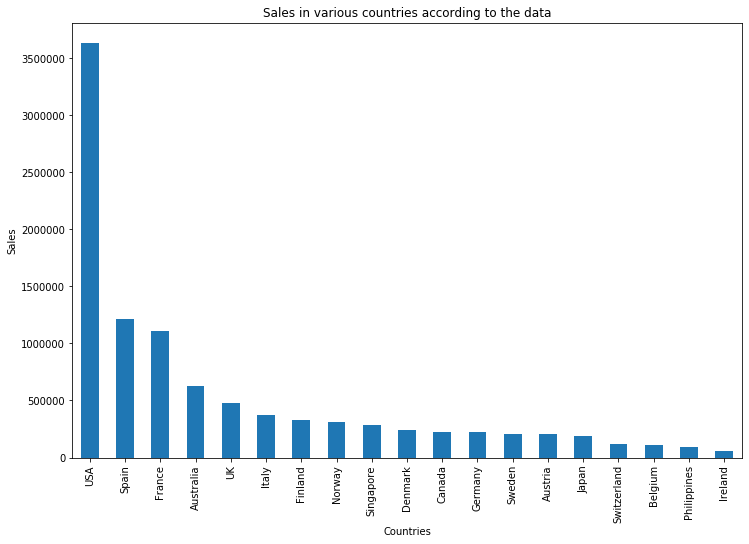

In [135]:
plt.figure(figsize =(12,8))

top_countries.plot(kind ='bar')


plt.xlabel('Countries')
plt.ylabel('Sales')
plt.title('Sales in various countries according to the data')

plt.show()

### After analysing the sales in various countries, We can see that USA comes in the first place followed by Spain and France. Business is the least in Belgium, Philippines and Ireland, Which the reason needs to be further looked into.

# 10.Number of unique customers in each month

<Figure size 1080x720 with 0 Axes>

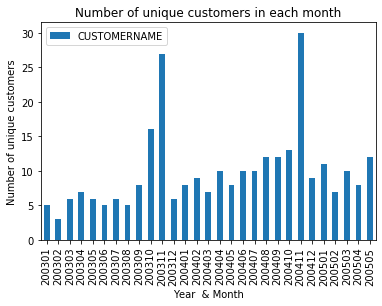

In [136]:
plt.figure(figsize =(15,10))

sales_data['YEAR_MONTH'] = sales_data['YEAR_ID'].map(str)+sales_data['MONTH_ID'].map(str).map(lambda x : x.rjust(2,'0'))

monthly_customers = sales_data.groupby(['YEAR_MONTH'])['CUSTOMERNAME'].nunique().reset_index()

monthly_customers.plot(kind = 'bar',x ='YEAR_MONTH', y ='CUSTOMERNAME')

plt.xlabel('Year  & Month')
plt.ylabel('Number of unique customers')
plt.title('Number of unique customers in each month')


plt.show()

### Just like what we found from the sales graph, The most number of unique customers are in the month of October and November

# 11.Average Sales per order

In [137]:
average_revenue = sales_data.groupby(['YEAR_ID','MONTH_ID'])['SALES'].mean().reset_index()
average_revenue

,YEAR_ID,MONTH_ID,SALES
0,2003,1,3327.015385
1,2003,2,3435.029024
2,2003,3,3490.098000
3,2003,4,3476.026724
4,2003,5,3321.950172
5,2003,6,3653.968696
6,2003,7,3754.637600
7,2003,8,3410.505172
8,2003,9,3473.333684
9,2003,10,3596.778291


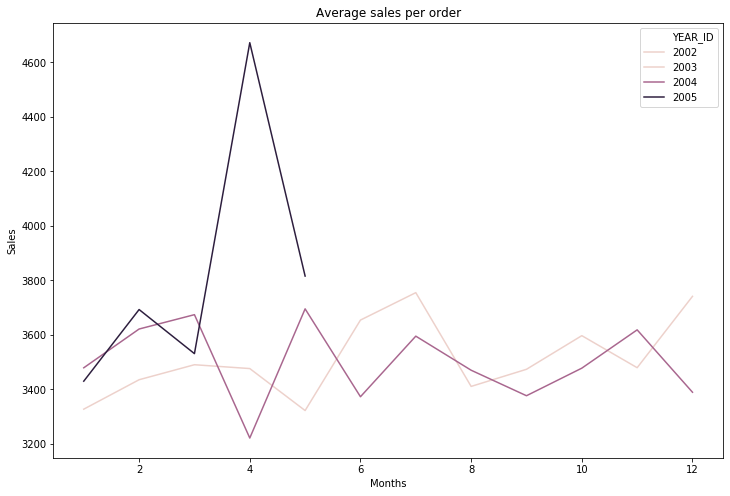

In [138]:
plt.figure(figsize =(12,8))

sns.lineplot(x='MONTH_ID',y='SALES',hue ='YEAR_ID',data = average_revenue)


plt.xlabel('Months')
plt.ylabel('Sales')
plt.title('Average sales per order')

plt.show()

### Average sales per order is the most in the year 2005 of months between April and June

# 12.Growth rate of new customers

In [139]:
sales_data_new_purchase = sales_data.groupby('CUSTOMERNAME').YEAR_MONTH.min().reset_index()
sales_data_new_purchase.columns =['CUSTOMERNAME','Newpurchase_Date']

In [140]:
sales_data_new_purchase

,CUSTOMERNAME,Newpurchase_Date
0,"AV Stores, Co.",200303
1,Alpha Cognac,200307
2,Amica Models & Co.,200408
3,"Anna's Decorations, Ltd",200309
4,Atelier graphique,200305
...,...,...
87,"Vida Sport, Ltd",200402
88,Vitachrome Inc.,200301
89,"Volvo Model Replicas, Co",200303
90,West Coast Collectables Co.,200312


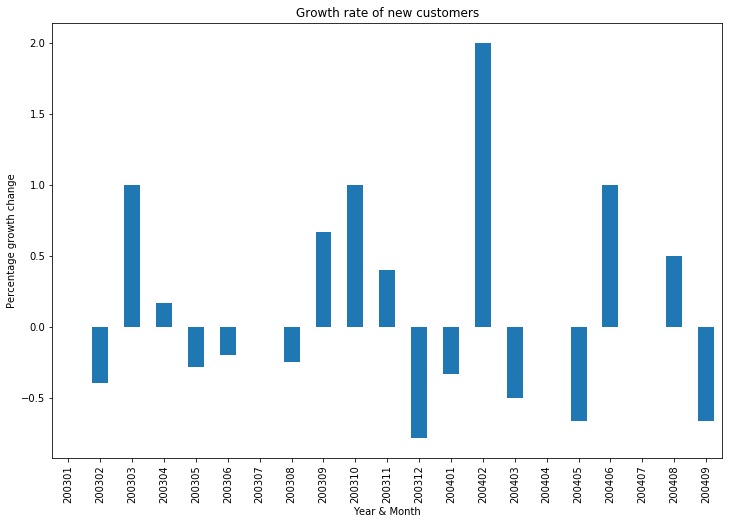

In [141]:
plt.figure(figsize =(12,8))


sales_data_new_purchase.groupby(['Newpurchase_Date'])['CUSTOMERNAME'].nunique().pct_change().plot(kind ='bar')

plt.xlabel('Year & Month')
plt.ylabel('Percentage growth change')
plt.title('Growth rate of new customers')

plt.show()

### After analysing the growth rate of new customers , We can see that the most growt occured in 2004 February.

### Segmentation with number of clusters chosen randomly

In [142]:
sales_data['ORDERDATE'] = [d.date() for d in sales_data['ORDERDATE'] ]
sales_data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,YEAR_MONTH
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,95,S10_1678,Land of Toys Inc.,NYC,USA,NaN,Yu,Kwai,Small,200302
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,95,S10_1678,Reims Collectables,Reims,France,EMEA,Henriot,Paul,Small,200305
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,95,S10_1678,Lyon Souveniers,Paris,France,EMEA,Da Cunha,Daniel,Medium,200307
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,95,S10_1678,Toys4GrownUps.com,Pasadena,USA,NaN,Young,Julie,Medium,200308
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,95,S10_1678,Corporate Gift Ideas Co.,San Francisco,USA,NaN,Brown,Julie,Medium,200310


# 13.Calculating Recency, Frequency and Monetary value for each customer

we are analyzing the next day after the  latest order date in the data set. 

Creating a variable "snapshot date" which is the latest date in data set.

### Recency : Recency is the number of days between the customer's latest order date and the snapshot date.
### Frequency: Number of purchases made by the customer
### MonetaryValue: Revenue generated by the customer

In [143]:
import datetime as dt

snapshot_date = sales_data['ORDERDATE'].max() + dt.timedelta(days=1)
sales_data_RFM = sales_data.groupby(['CUSTOMERNAME']).agg({
    'ORDERDATE': lambda x: (snapshot_date - x.max()).days,
    'ORDERNUMBER': 'count',
    'SALES':'sum'})

#Renaming the columns
sales_data_RFM.rename(columns={'ORDERDATE': 'Recency',
                   'ORDERNUMBER': 'Frequency',
                   'SALES': 'MonetaryValue'}, inplace=True)

In [144]:
sales_data_RFM.head()

,Recency,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",196,51,157807.81
Alpha Cognac,65,20,70488.44
Amica Models & Co.,265,26,94117.26
"Anna's Decorations, Ltd",84,46,153996.13
Atelier graphique,188,7,24179.96


### Dividing the customer into 4 segments according to Recency, Frequency and MonetaryValue(Level4 > Level3>Level2>Level1)

#### Lower the recency, higher the Recency level
#### Higher the number of orders, higher the Frequency level
#### Higher the monetary value, higher the MonetaryValue level



In [145]:
#Dividing into 4 segments

#Creating  a spend quartile with 4 groups - a range between 1 and 5

MonetaryValue_quartile = pd.qcut(sales_data_RFM['MonetaryValue'], q=4, labels=range(1,5))
Recency_quartile = pd.qcut(sales_data_RFM['Recency'], q=4, labels=list(range(4, 0, -1)))
Frequency_quartile = pd.qcut(sales_data_RFM['Frequency'], q=4, labels=range(1,5))


# Assign the quartile values to the Spend_Quartile column in data
sales_data_RFM['R'] = Recency_quartile
sales_data_RFM['F'] = Frequency_quartile
sales_data_RFM['M'] = MonetaryValue_quartile

#df_RFM[['MonetaryValue_Quartile','Recency_quartile','Frequency_quartile']] = [MonetaryValue_quartile,Recency_quartile,Frequency_quartile]

In [146]:
sales_data_RFM.head()

,Recency,Frequency,MonetaryValue,R,F,M
CUSTOMERNAME,,,,,,
"AV Stores, Co.",196,51,157807.81,2,4,4
Alpha Cognac,65,20,70488.44,4,2,2
Amica Models & Co.,265,26,94117.26,1,2,3
"Anna's Decorations, Ltd",84,46,153996.13,3,4,4
Atelier graphique,188,7,24179.96,2,1,1


### Calculating the RFM score

In [147]:
sales_data_RFM['RFM_Score'] = sales_data_RFM[['R','F','M']].sum(axis=1)
sales_data_RFM.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score
CUSTOMERNAME,,,,,,,
"AV Stores, Co.",196,51,157807.81,2,4,4,10.0
Alpha Cognac,65,20,70488.44,4,2,2,8.0
Amica Models & Co.,265,26,94117.26,1,2,3,6.0
"Anna's Decorations, Ltd",84,46,153996.13,3,4,4,11.0
Atelier graphique,188,7,24179.96,2,1,1,4.0


#### Assuming

#### RFM Score > 10 - High Value Customer
#### RFM SCore < 10 and RFM Score >= 6 - Mid Value Customer
#### RFM Score < 6 - Low Value Customer

In [148]:
def rfm_level(sales_data):
    if np.bool(sales_data['RFM_Score'] >= 10):
        return 'High Value Customer'
    elif np.bool((sales_data['RFM_Score'] < 10) & (sales_data['RFM_Score'] >= 6)):
        return 'Mid Value Customer'
    else:
        return 'Low Value Customer'


sales_data_RFM['RFM_Level'] = sales_data_RFM.apply(rfm_level, axis=1)


sales_data_RFM.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,RFM_Level
CUSTOMERNAME,,,,,,,,
"AV Stores, Co.",196,51,157807.81,2,4,4,10.0,High Value Customer
Alpha Cognac,65,20,70488.44,4,2,2,8.0,Mid Value Customer
Amica Models & Co.,265,26,94117.26,1,2,3,6.0,Mid Value Customer
"Anna's Decorations, Ltd",84,46,153996.13,3,4,4,11.0,High Value Customer
Atelier graphique,188,7,24179.96,2,1,1,4.0,Low Value Customer


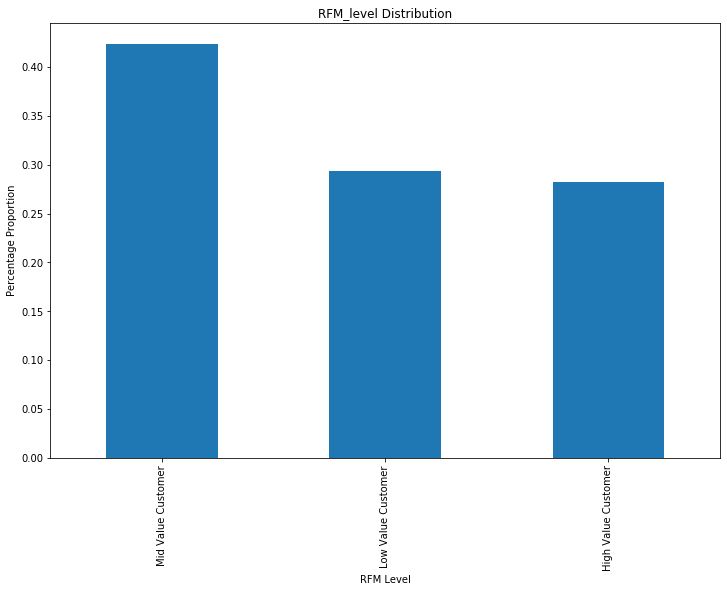

In [149]:
plt.figure(figsize=(12,8))

sales_data_RFM['RFM_Level'].value_counts(normalize = True).plot(kind='bar')

plt.title('RFM_level Distribution')

plt.xlabel('RFM Level')

plt.ylabel('Percentage Proportion')
plt.show()

### After analysing the Recency Frequency and Monetary value of the sales data,We can come to the conclusion that Mid value customers are the most among the customers followed by Low and high. One thing to note is that there is not much  difference between low value customer and high level customer.

### Higher the monetary value, higher the MonetaryValue level

### Analyzing customer segments
### Calculating the  average values for each RFM_Level, and returning a size of each segment 

In [150]:

rfm_level_agg = sales_data_RFM.groupby(['RFM_Level']).agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue':['mean','count']}).round(1)

# Print the aggregated dataset
print(rfm_level_agg)

                    Recency Frequency MonetaryValue      
                       mean      mean          mean count
RFM_Level                                                
High Value Customer    85.0      54.3      193532.1    26
Low Value Customer    293.8      15.0       52414.6    27
Mid Value Customer    171.2      25.8       91938.5    39


# 14. Segmentation using KMeans clustering algorithm

K Means Assumptions

1.All variables have symmetrical (Normal) Distribution <br>
2.All Variables have same average value(approx) <br>
3.All Variables have same variance(approx)<br>

In [151]:
from sklearn.preprocessing import StandardScaler


from sklearn.cluster import KMeans

In [152]:
data = sales_data_RFM[['Recency','Frequency','MonetaryValue']]
data.head()

,Recency,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",196,51,157807.81
Alpha Cognac,65,20,70488.44
Amica Models & Co.,265,26,94117.26
"Anna's Decorations, Ltd",84,46,153996.13
Atelier graphique,188,7,24179.96


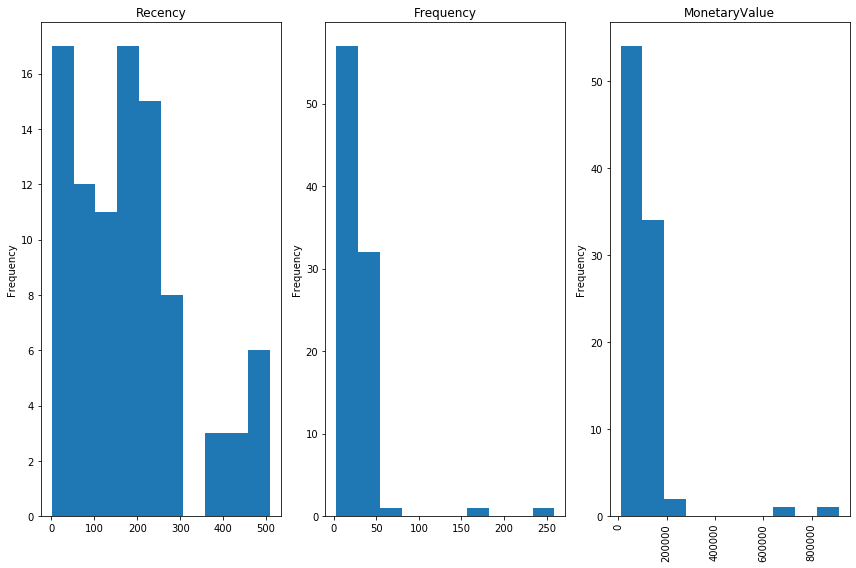

In [153]:
plt.figure(figsize=(12,8))

plt.subplot(1,3,1)
data['Recency'].plot(kind='hist')
plt.title('Recency')

plt.subplot(1,3,2)
data['Frequency'].plot(kind='hist')
plt.title('Frequency')

plt.subplot(1,3,3)
data['MonetaryValue'].plot(kind='hist')
plt.xticks(rotation = 90)
plt.title('MonetaryValue')

plt.tight_layout()
plt.show()

#### We can see that the historam is skewed. Inorder to remove the skewness , Taking the log transformation of the variables

In [154]:
data_log = np.log(data)
data_log.head()

,Recency,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",5.278115,3.931826,11.969133
Alpha Cognac,4.174387,2.995732,11.163204
Amica Models & Co.,5.579730,3.258097,11.452297
"Anna's Decorations, Ltd",4.430817,3.828641,11.944683
Atelier graphique,5.236442,1.945910,10.093279


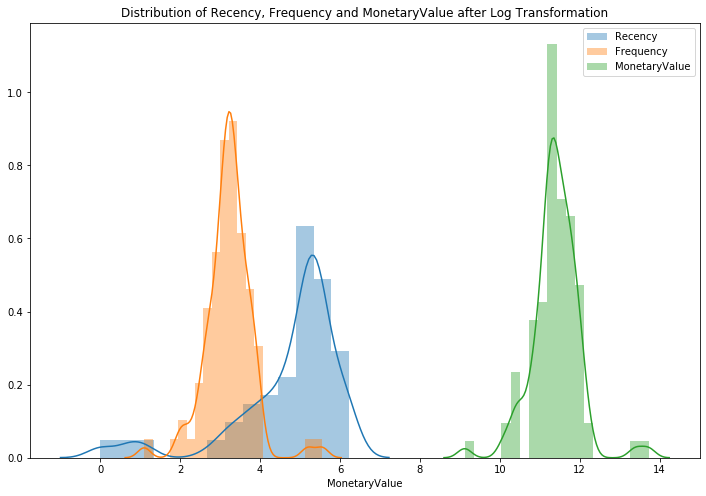

In [155]:
plt.figure(figsize=(12,8))


sns.distplot(data_log['Recency'],label='Recency')


sns.distplot(data_log['Frequency'],label='Frequency')


sns.distplot(data_log['MonetaryValue'],label='MonetaryValue')

plt.title('Distribution of Recency, Frequency and MonetaryValue after Log Transformation')
plt.legend()
plt.show()

### Standardizing the variables for equal variance and mean

In [156]:

scaler = StandardScaler()

scaler.fit(data_log)


data_normalized = scaler.transform(data_log)

data_normalized = pd.DataFrame(data_normalized, index=data_log.index, columns=data_log.columns)

data_normalized.describe().round(2)

,Recency,Frequency,MonetaryValue
count,92.00,92.00,92.00
mean,0.00,-0.00,0.00
std,1.01,1.01,1.01
min,-3.51,-3.67,-3.82
25%,-0.24,-0.41,-0.39
50%,0.37,0.06,-0.04
75%,0.53,0.45,0.52
max,1.12,4.03,3.92


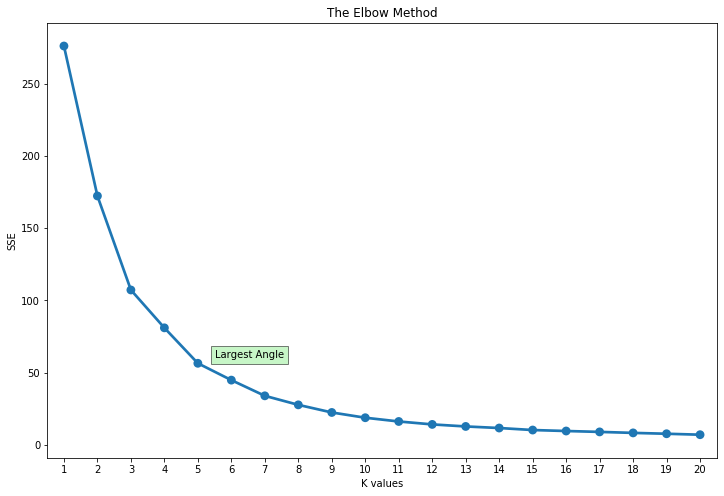

In [157]:

sse={}
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data_normalized)
    sse[k] = kmeans.inertia_ 

    
plt.figure(figsize=(12,8))
# Add the plot title "The Elbow Method"
plt.title('The Elbow Method')

# Add X-axis label "k"
plt.xlabel('K values')

# Add Y-axis label "SSE"
plt.ylabel('SSE')

# Plot SSE values for each key in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.text(4.5,60,"Largest Angle",bbox=dict(facecolor='lightgreen', alpha=0.5))
plt.show()

#### We can see that the largest angle is for the K value = 5 . Taking n_cluster value as 5 and fitting the data

In [158]:

kmeans = KMeans(n_clusters=5, random_state=1) 


kmeans.fit(data_normalized)


cluster_labels = kmeans.labels_


data_rfm = data.assign(Cluster=cluster_labels)

data_rfm.head()

,Recency,Frequency,MonetaryValue,Cluster
CUSTOMERNAME,,,,
"AV Stores, Co.",196,51,157807.81,0
Alpha Cognac,65,20,70488.44,4
Amica Models & Co.,265,26,94117.26,4
"Anna's Decorations, Ltd",84,46,153996.13,0
Atelier graphique,188,7,24179.96,1


#### Grouping the data by the cluster

In [159]:

grouped = data_rfm.groupby(['Cluster'])


grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         133.4      36.4      130895.7    32
1         324.2      10.7       35628.7    12
2           4.6      39.0      135721.0     5
3           2.0     219.5      783576.1     2
4         210.6      21.8       77333.3    41

# 15. Finding customer personas  using Snake plot

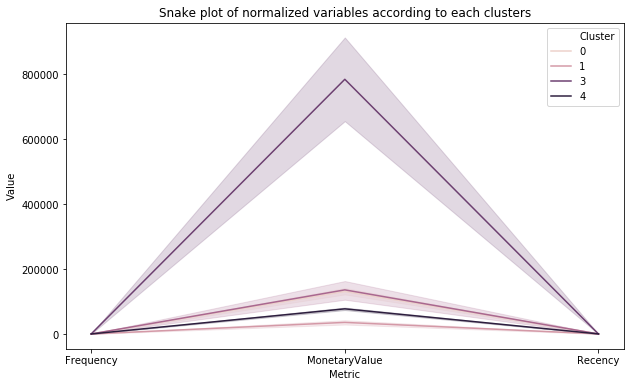

In [160]:
data_rfm_melt = pd.melt(data_rfm.reset_index(), id_vars=['CUSTOMERNAME', 'Cluster'],
                        value_vars=['Recency', 'Frequency', 'MonetaryValue'], 
                        var_name='Metric', value_name='Value')

plt.figure(figsize=(10,6))

plt.title('Snake plot of normalized variables according to each clusters')


plt.xlabel('Metric')


plt.ylabel('Value')

sns.lineplot(data=data_rfm_melt, x='Metric', y='Value', hue='Cluster')
plt.show()

##### Customer Pesonas can build by determining the summary stats of RFM values or Snake Plot. Snake Plots is a Market Research technique used to compare segments. Visual representation of each segment's attributes helps us to determine the relative Importance of segment attributes.

# 16. Relative importance of each attributes

In [161]:
cluster_avg = data_rfm.groupby(['Cluster']).mean() 
print(cluster_avg)

            Recency   Frequency  MonetaryValue
Cluster                                       
0        133.406250   36.437500  130895.744687
1        324.250000   10.666667   35628.653333
2          4.600000   39.000000  135721.034000
3          2.000000  219.500000  783576.085000
4        210.560976   21.829268   77333.264390


##### This is the average RFM values for each cluster

In [162]:
population_avg = data.mean()
print(population_avg)

Recency             182.826087
Frequency            30.684783
MonetaryValue    109050.313587
dtype: float64


##### This is the average RFM values for total customer population

In [163]:
relative_imp = cluster_avg / population_avg - 1


print(relative_imp.round(2))

         Recency  Frequency  MonetaryValue
Cluster                                   
0          -0.27       0.19           0.20
1           0.77      -0.65          -0.67
2          -0.97       0.27           0.24
3          -0.99       6.15           6.19
4           0.15      -0.29          -0.29


##### This is the relative importance of cluster's attribute value compared to population

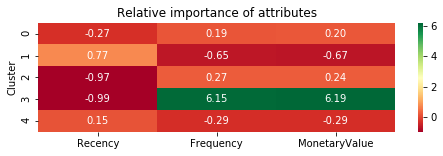

In [164]:
plt.figure(figsize=(8, 2))


plt.title('Relative importance of attributes')


sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

##### Heatmap of relative importance 